# Getting Started with Keras!

*aka boring stuff first...*

In this tutorial we will demonstrate how to load a dataset, define a simple keras model and evaluate its performance!


Let's start by loading the data! Keras provides an easy to use interface for several datasets, so we will use it to load the well-known MNIST dataset.

In [1]:
import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Train/test data shape:", x_train.shape, x_test.shape)
print("Train/test labels shape:", y_train.shape, y_test.shape)


11490434/11490434 [==============================] - 0s 0us/step
Train/test data shape: (60000, 28, 28) (10000, 28, 28)
Train/test labels shape: (60000,) (10000,)


Verify that we indeed loaded the correct dataset :p

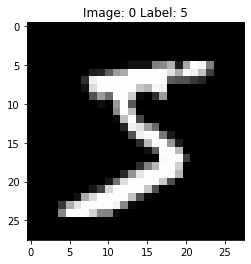

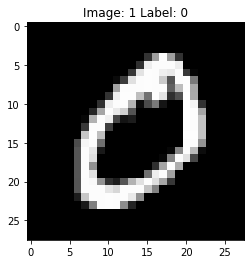

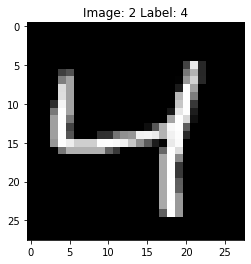

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

for i in range(3):
    plt.figure(i)
    plt.imshow(x_train[i], cmap='gray')
    plt.title("Image: " + str(i) + " Label: " + str(y_train[i]))



Prepare the data (reshape into vectors and encode the labels as one-hot vectors):


In [3]:
# Reshape and normalize the data
x_train = x_train.reshape((-1, 28*28)) / 255.0
x_test = x_test.reshape((-1, 28*28)) / 255.0

# Encode the labels
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print("Train/test data shape:", x_train.shape, x_test.shape)
print("Train/test labels shape:", y_train.shape, y_test.shape)
print(y_train[0], np.argmax(y_train[0]))
print(y_train[0], np.argmax(y_train[1]))
print(y_train[0], np.argmax(y_train[2]))


Train/test data shape: (60000, 784) (10000, 784)
Train/test labels shape: (60000, 10) (10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 0
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 4


Define a simple Multilayer Perceptron (MLP):

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()

# For the first layer we have to define the input dimensionality
model.add(Dense(64, activation='relu', input_dim=784))
# Add a second hidden layer
model.add(Dense(256, activation='relu'))
# Add an output layer (the number of neurons must match the number of classes)
model.add(Dense(10, activation='softmax'))

After defining the model we have to compile it!


In [5]:
# Select an optimizer
adam = Adam(lr=0.0001)
# Select the loss function and metrics that should be monitored
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


We are now ready to train our model!!! 

*There are three different reporting levels: verbose=0 (no reporting), verbose=1 (progress bar), and verbose=2 (one line per epoch)*

In [6]:
model.fit(x_train, y_train, epochs=50, batch_size=256, verbose=2)

Epoch 1/50
235/235 - 4s - loss: 1.4366 - accuracy: 0.6490 - 4s/epoch - 17ms/step
Epoch 2/50
235/235 - 2s - loss: 0.4785 - accuracy: 0.8772 - 2s/epoch - 9ms/step
Epoch 3/50
235/235 - 2s - loss: 0.3450 - accuracy: 0.9026 - 2s/epoch - 7ms/step
Epoch 4/50
235/235 - 1s - loss: 0.2943 - accuracy: 0.9163 - 1s/epoch - 5ms/step
Epoch 5/50
235/235 - 2s - loss: 0.2635 - accuracy: 0.9250 - 2s/epoch - 8ms/step
Epoch 6/50
235/235 - 1s - loss: 0.2421 - accuracy: 0.9308 - 1s/epoch - 6ms/step
Epoch 7/50
235/235 - 1s - loss: 0.2248 - accuracy: 0.9361 - 1s/epoch - 5ms/step
Epoch 8/50
235/235 - 1s - loss: 0.2114 - accuracy: 0.9390 - 1s/epoch - 5ms/step
Epoch 9/50
235/235 - 1s - loss: 0.1995 - accuracy: 0.9427 - 1s/epoch - 4ms/step
Epoch 10/50
235/235 - 1s - loss: 0.1893 - accuracy: 0.9449 - 1s/epoch - 5ms/step
Epoch 11/50
235/235 - 1s - loss: 0.1799 - accuracy: 0.9485 - 1s/epoch - 5ms/step
Epoch 12/50
235/235 - 1s - loss: 0.1715 - accuracy: 0.9506 - 1s/epoch - 5ms/step
Epoch 13/50
235/235 - 1s - loss: 0.1

Let's see what we have got!

In [7]:
print("Train accuracy: ", model.evaluate(x_train, y_train, batch_size=128))
print("Test accuracy: ", model.evaluate(x_test, y_test, batch_size=128))

469/469 [==============================] - 2s 3ms/step - loss: 0.0515 - accuracy: 0.9858
Train accuracy:  [0.05146428942680359, 0.9858333468437195]
79/79 [==============================] - 1s 9ms/step - loss: 0.0878 - accuracy: 0.9728
Test accuracy:  [0.08776858448982239, 0.9728000164031982]


Get the actual output of the network:

In [8]:
y_out = model.predict(x_train)
print(y_out[0], np.argmax(y_out[0]))

1875/1875 [==============================] - 5s 2ms/step
[2.8655897e-12 2.9588199e-09 5.7809020e-09 6.3975528e-03 1.1355046e-15
 9.9360240e-01 2.1509023e-13 1.2742800e-09 8.7500882e-11 5.7489489e-09] 5


Examine the behavior of the network a bit more in depth:

In [9]:
for i in range(10):
    print("Prediction order: ", np.argsort(y_out[i])[::-1], "True label: ", np.argmax(y_train[i]))

Prediction order:  [5 3 2 9 1 7 8 0 6 4] True label:  5
Prediction order:  [0 2 9 6 7 3 1 5 8 4] True label:  0
Prediction order:  [4 3 9 7 2 6 1 8 5 0] True label:  4
Prediction order:  [1 7 2 4 8 3 9 6 0 5] True label:  1
Prediction order:  [9 4 8 7 3 5 1 2 0 6] True label:  9
Prediction order:  [2 3 7 4 8 0 9 1 6 5] True label:  2
Prediction order:  [1 3 8 2 4 9 7 5 6 0] True label:  1
Prediction order:  [3 8 9 5 2 7 1 0 4 6] True label:  3
Prediction order:  [1 3 8 9 7 4 6 2 5 0] True label:  1
Prediction order:  [4 6 2 5 0 8 7 9 1 3] True label:  4
